In [4]:
import pandas as pd
from prophet import Prophet
import itertools
import numpy as np
import plotly.graph_objects as go
import yfinance as yf

In [179]:
data = yf.download(tickers='IRCTC.NS', period='1d', interval='5m')
data.to_csv("IRCTC.csv")

[*********************100%***********************]  1 of 1 completed


In [15]:
df_temp=pd.read_csv("INFY.csv")


df_temp.tail()

[*********************100%***********************]  1 of 1 completed


,Datetime,Open,High,Low,Close,Adj Close,Volume
332,2021-09-23 14:47:00+05:30,1739.900024,1740.550049,1739.099976,1740.199951,1740.199951,22931
333,2021-09-23 14:48:00+05:30,1740.150024,1742.000000,1740.150024,1742.000000,1742.000000,22121
334,2021-09-23 14:49:00+05:30,1741.900024,1744.000000,1741.900024,1743.000000,1743.000000,25035
335,2021-09-23 14:50:00+05:30,1743.000000,1743.599976,1742.400024,1742.400024,1742.400024,14743
336,2021-09-23 14:51:29+05:30,1741.849976,1741.849976,1741.849976,1741.849976,1741.849976,0


In [180]:

df_temp = pd.read_csv("IRCTC.csv")

In [181]:
df_temp

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2021-09-23 09:15:00+05:30,3739.850098,3759.000000,3712.649902,3722.000000,3722.000000,105287
1,2021-09-23 09:20:00+05:30,3720.000000,3725.899902,3696.250000,3708.649902,3708.649902,105557
2,2021-09-23 09:25:00+05:30,3707.850098,3722.850098,3707.100098,3718.000000,3718.000000,44165
3,2021-09-23 09:30:00+05:30,3719.000000,3725.000000,3716.000000,3717.000000,3717.000000,36101
4,2021-09-23 09:35:00+05:30,3715.000000,3723.000000,3715.000000,3718.699951,3718.699951,24633
...,...,...,...,...,...,...,...
70,2021-09-23 15:05:00+05:30,3699.500000,3699.649902,3695.649902,3697.000000,3697.000000,14642
71,2021-09-23 15:10:00+05:30,3697.000000,3697.000000,3691.100098,3693.500000,3693.500000,27113
72,2021-09-23 15:15:00+05:30,3691.000000,3694.949951,3690.000000,3690.949951,3690.949951,36840
73,2021-09-23 15:20:00+05:30,3690.000000,3693.199951,3681.000000,3692.500000,3692.500000,56864


In [182]:

df=df_temp[["Datetime","Close"]]

In [183]:
df[-20:]

,Datetime,Close
55,2021-09-23 13:50:00+05:30,3692.000000
56,2021-09-23 13:55:00+05:30,3690.000000
57,2021-09-23 14:00:00+05:30,3689.000000
58,2021-09-23 14:05:00+05:30,3690.000000
59,2021-09-23 14:10:00+05:30,3692.350098
60,2021-09-23 14:15:00+05:30,3691.199951
61,2021-09-23 14:20:00+05:30,3691.449951
62,2021-09-23 14:25:00+05:30,3691.399902
63,2021-09-23 14:30:00+05:30,3696.000000
64,2021-09-23 14:35:00+05:30,3694.699951


In [184]:
date = pd.read_csv("date.csv")
df["Datetime"] = date["Date"]

<ipython-input-184-6d58ee315ab1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Datetime"] = date["Date"]


In [185]:
df

,Datetime,Close
0,2020/09/23,3722.000000
1,2020/09/24,3708.649902
2,2020/09/25,3718.000000
3,2020/09/26,3717.000000
4,2020/09/27,3718.699951
...,...,...
70,2020/12/02,3697.000000
71,2020/12/03,3693.500000
72,2020/12/04,3690.949951
73,2020/12/05,3692.500000


In [186]:
df.dtypes

Datetime     object
Close       float64
dtype: object

In [187]:
df["Datetime"]=pd.to_datetime(df["Datetime"])

<ipython-input-187-38c058f42096>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Datetime"]=pd.to_datetime(df["Datetime"])


In [188]:
df.dtypes

Datetime    datetime64[ns]
Close              float64
dtype: object

In [189]:
df.columns=['ds','y']

In [190]:
df[-20:]

,ds,y
55,2020-11-17,3692.000000
56,2020-11-18,3690.000000
57,2020-11-19,3689.000000
58,2020-11-20,3690.000000
59,2020-11-21,3692.350098
60,2020-11-22,3691.199951
61,2020-11-23,3691.449951
62,2020-11-24,3691.399902
63,2020-11-25,3696.000000
64,2020-11-26,3694.699951


In [191]:
m= Prophet(interval_width=0.9,daily_seasonality=True)
model = m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [192]:
future = m.make_future_dataframe(periods=50,freq='D')
forecast=m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
120,2021-01-21,219.388779,3520.492873,3898.526042,24.650634,401.744445,3497.077025,3497.077025,3497.077025,3498.099414,3498.099414,3498.099414,-1.022389,-1.022389,-1.022389,0.0,0.0,0.0,3716.465804
121,2021-01-22,219.828779,3516.233875,3904.800782,19.079385,409.370875,3497.454524,3497.454524,3497.454524,3498.099414,3498.099414,3498.099414,-0.644890,-0.644890,-0.644890,0.0,0.0,0.0,3717.283303
122,2021-01-23,220.268779,3511.967467,3915.881434,13.593274,417.014530,3497.805545,3497.805545,3497.805545,3498.099414,3498.099414,3498.099414,-0.293869,-0.293869,-0.293869,0.0,0.0,0.0,3718.074324
123,2021-01-24,220.708779,3508.440541,3924.115735,9.237117,424.649766,3498.739124,3498.739124,3498.739124,3498.099414,3498.099414,3498.099414,0.639710,0.639710,0.639710,0.0,0.0,0.0,3719.447903
124,2021-01-25,221.148779,3503.555092,3929.247652,4.576838,431.640471,3497.703857,3497.703857,3497.703857,3498.099414,3498.099414,3498.099414,-0.395557,-0.395557,-0.395557,0.0,0.0,0.0,3718.852636


In [193]:
print(forecast[["ds","yhat"]][-25:])
print(df[-10:])


            ds         yhat
100 2021-01-01  3708.043302
101 2021-01-02  3708.834324
102 2021-01-03  3710.207903
103 2021-01-04  3709.612635
104 2021-01-05  3710.845400
105 2021-01-06  3712.207980
106 2021-01-07  3710.305804
107 2021-01-08  3711.123303
108 2021-01-09  3711.914324
109 2021-01-10  3713.287903
110 2021-01-11  3712.692636
111 2021-01-12  3713.925400
112 2021-01-13  3715.287980
113 2021-01-14  3713.385804
114 2021-01-15  3714.203303
115 2021-01-16  3714.994324
116 2021-01-17  3716.367903
117 2021-01-18  3715.772636
118 2021-01-19  3717.005400
119 2021-01-20  3718.367980
120 2021-01-21  3716.465804
121 2021-01-22  3717.283303
122 2021-01-23  3718.074324
123 2021-01-24  3719.447903
124 2021-01-25  3718.852636
           ds            y
65 2020-11-27  3691.000000
66 2020-11-28  3689.800049
67 2020-11-29  3692.000000
68 2020-11-30  3693.000000
69 2020-12-01  3699.699951
70 2020-12-02  3697.000000
71 2020-12-03  3693.500000
72 2020-12-04  3690.949951
73 2020-12-05  3692.500000
74

In [154]:
#fig = go.Figure(data=[go.Candlestick(x=forecast)])

#fig.update_layout(xaxis_rangeslider_visible=False)
#fig.show()

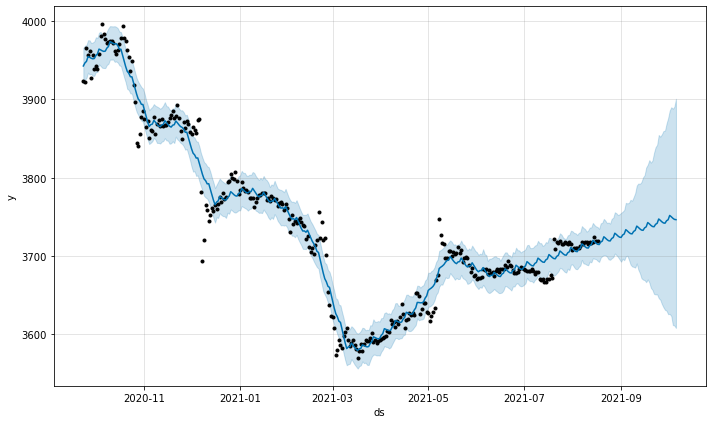

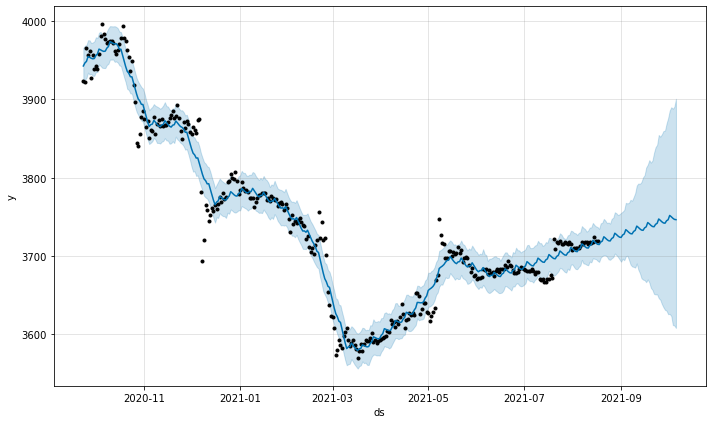

In [155]:
m.plot(forecast)

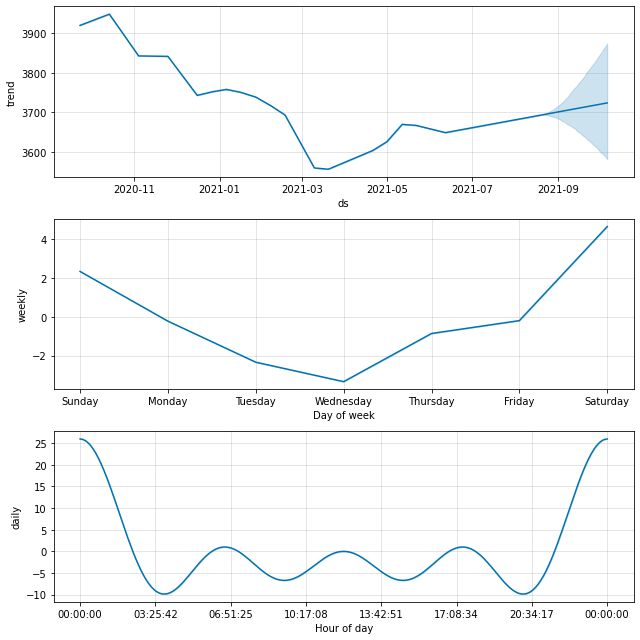

In [156]:
plot2 = m.plot_components(forecast)